# Homework 2

Deadline: lab session in the week of **25-28.11.2024**
Each task is worth 1 point.

In [1]:
import numpy as np 
import pandas as pd 
import torch 
import matplotlib.pyplot as plt

## 1. Maximization of Functions using Gradient Descent



**Task**:
- (a) Maximize the function $f(x) = -x^4 + 4x^2 - 2x + 1$, where $f: \mathbb{R} \to \mathbb{R}$, using gradient ascent. Implement the optimization using PyTorch and plot the convergence over iterations.
- (b) Maximize the function $f(x, y, z) = -x^2 - y^2 - z^2 + 2xy - yz + 3z$, where $f: \mathbb{R}^3 \to \mathbb{R}$, using gradient ascent. Implement the optimization using PyTorch and visualize the optimization path.


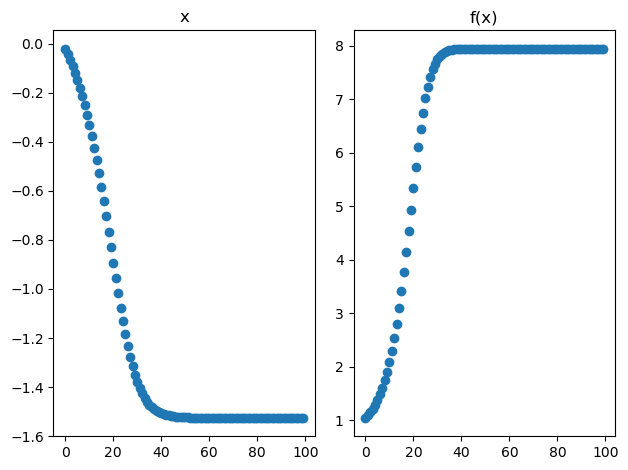

max f(x) = 7.943973062847431 for x = -1.5256868600845337


In [2]:
# (a)
LEARNING_RATE = 0.01
NUM_ITERATIONS = 100
res= []

def f(x):
    return -x**4 + 4 * x**2 - 2 * x + 1

x = torch.tensor([0.0], requires_grad=True)
optimizer = torch.optim.SGD([x], lr=LEARNING_RATE)

for i in range(NUM_ITERATIONS):
    optimizer.zero_grad()
    
    y = f(x)
    loss = -y 
    
    loss.backward() # backpropagation
    optimizer.step() # update x
    
    res.append([i, x.item()])


# making plot
res = np.array(res)
fig, axes = plt.subplots(1, 2)

axes[0].set_title('x')
axes[0].plot(res[:, 0], res[:, 1], 'o')
axes[1].set_title('f(x)')
axes[1].plot(res[:, 0], f(res[:, 1]),'o')
plt.tight_layout()
plt.show()

print(f'max f(x) = {f(res[-1, 1])} for x = {res[-1, 1]}')


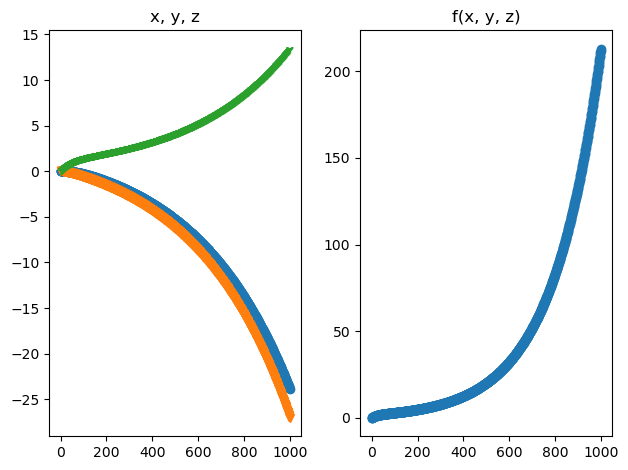

max f(x, y, z) = 212.9211183749294 for x = -23.861845016479492, y = -27.032453536987305, z = 13.430922508239746
so it seems that the function doesn't have maximum (wolfram alpha also says that)


In [3]:
# (b)
LEARNING_RATE = 0.01
NUM_ITERATIONS = 1000
res= []

def f(x, y, z):
    return -x**2 - y**2 -z**2 + 2*x*y - y*z + 3*z

x = torch.tensor([0.0], requires_grad=True) 
y = torch.tensor([0.0], requires_grad=True)
z = torch.tensor([0.0], requires_grad=True)
optimizer = torch.optim.SGD([x, y, z], lr=LEARNING_RATE)

for i in range(NUM_ITERATIONS):
    optimizer.zero_grad()
    
    out = f(x, y, z)
    loss = -out 
    
    loss.backward() # backpropagation
    optimizer.step() # update x, y, z
    
    res.append([i, x.item(), y.item(), z.item()])


# making plot
res = np.array(res)
fig, axes = plt.subplots(1, 2)

axes[0].set_title('x, y, z')
axes[0].plot(res[:, 0], res[:, 1], 'o')
axes[0].plot(res[:, 0], res[:, 2], 'v')
axes[0].plot(res[:, 0], res[:, 3], '1')

axes[1].set_title('f(x, y, z)')
axes[1].plot(res[:, 0], f(res[:, 1], res[:, 2], res[:, 3]), 'o')
plt.tight_layout()
plt.show()

print(f'max f(x, y, z) = {f(res[-1, 1], res[-1, 2], res[-1, 3])} for x = {res[-1, 1]}, y = {res[-1, 2]}, z = {res[-1, 3]}')
print("so it seems that the function doesn't have maximum (wolfram alpha also says that)")

## 2. Linear Regression in PyTorch


**Dataset**: Use the following code to generate a synthetic dataset with 100 samples, each with one feature:


[Parameter containing:
tensor([[2.9985]], requires_grad=True), Parameter containing:
tensor([3.9511], requires_grad=True)]


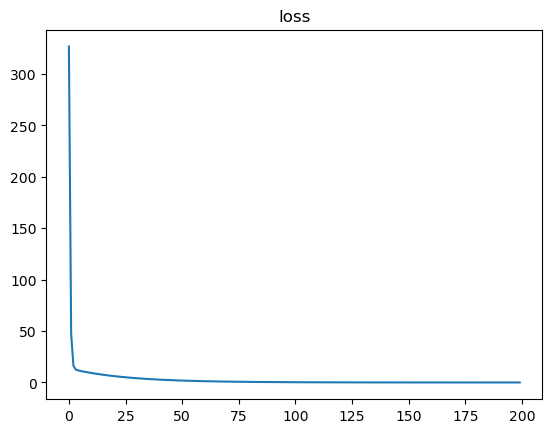

In [4]:
# making data 
import numpy as np
np.random.seed(0)
X = np.random.uniform(-10, 10, 100)
epsilon = np.random.normal(0, 0.1, 100) # normal (gaussian) distribution 
y = 3 * X + 4 + epsilon

X = torch.from_numpy(X).float().unsqueeze(1) # shape (100, 1)
y = torch.from_numpy(y).float().unsqueeze(1) # shape (100, 1)

# create model with one linear layer
class linearRegression(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = torch.nn.Linear(in_features=1, out_features=1)

    def forward(self, x):
        return self.linear(x)
    
LEARNING_RATE = 0.01
NUM_ITERATIONS = 200

model = linearRegression()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)
loss_list = []

# training loop
for epoch in range(NUM_ITERATIONS):
    optimizer.zero_grad()

    out = model(X) # make prediction
    loss = criterion(out, y) # calculate loss
    loss.backward() # backpropagation
    optimizer.step() # update parameters
    loss_list.append([epoch, loss.item()])
    
print(list(model.parameters()))  # y = ax + b, our a = 2.9986, b = 3.9545

# making plot
loss_list = np.array(loss_list)
plt.plot(loss_list[:, 0], loss_list[:, 1])
plt.title('loss')
plt.show()


**Task**: Implement a linear regression model using PyTorch to predict the target variable $y$. Train the model to minimize the Mean Squared Error (MSE).


## 3. Learning Rate Analysis


**Dataset**: Use the same dataset from Problem 2.

**Task**: Modify the `gradient_descent()` function to include different learning rates (0.01, 0.1, 1.0). Visualize the convergence behaviors of gradient descent with each learning rate.


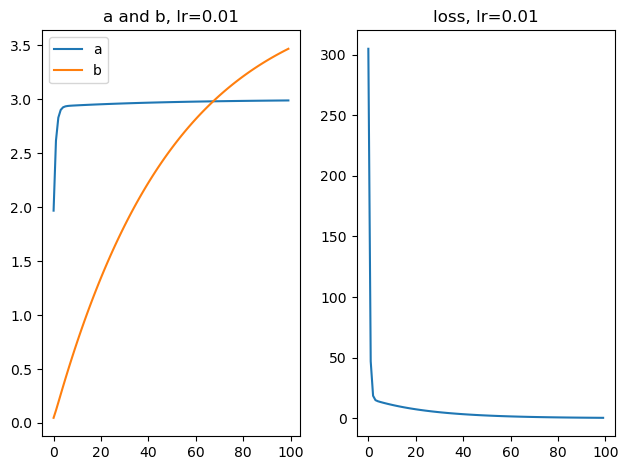

a = 2.9904978275299072, b = 3.469449996948242


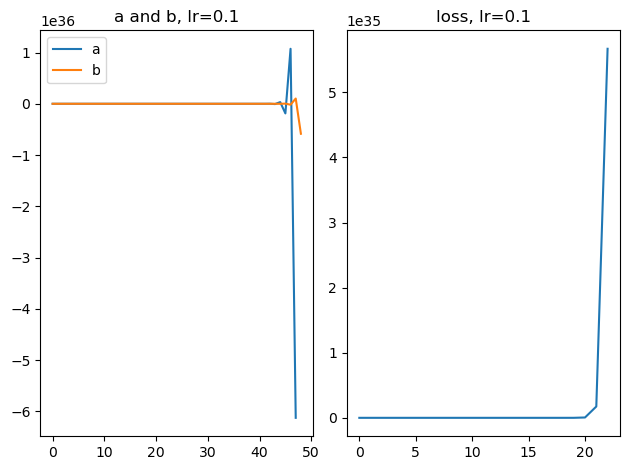

a = nan, b = nan


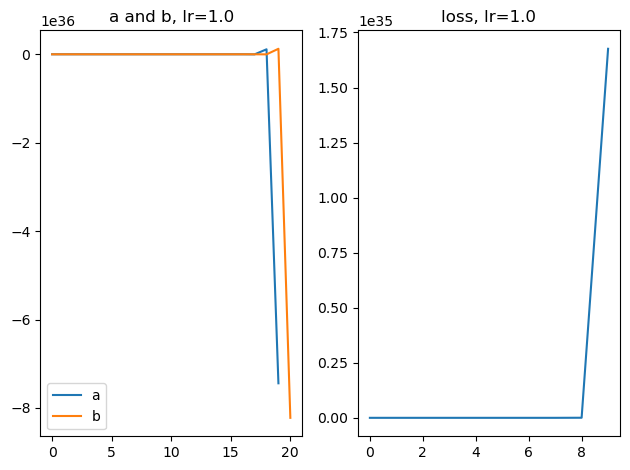

a = nan, b = nan


In [5]:
# making data 
import numpy as np
np.random.seed(0)
X = np.random.uniform(-10, 10, 100)
epsilon = np.random.normal(0, 0.1, 100) # normal (gaussian) distribution 
y = 3 * X + 4 + epsilon

X = torch.from_numpy(X).float().unsqueeze(1) # shape (100, 1)
y = torch.from_numpy(y).float().unsqueeze(1) # shape (100, 1)

# preparing model
LEARNING_RATE = [0.01, 0.1, 1.0] # I made some tests and 0.03 looks interestingly
NUM_ITERATIONS = 100

criterion = torch.torch.nn.MSELoss()

def f(x, a, b):
    return a*x + b
    
# training loop
res = [[], [], []]
for option in range(3):
    a = torch.tensor([0.0], requires_grad=True) # prepare parameters
    b = torch.tensor([0.0], requires_grad=True)
    optimizer = torch.optim.SGD([a, b], lr=LEARNING_RATE[option]) # create optimizer 
    for epoch in range(NUM_ITERATIONS):
        optimizer.zero_grad()
        
        out = f(X, a, b) # make predictions
        loss = criterion(out, y) # compute loss
        loss.backward() # backpropagate
        optimizer.step() # optimize a and b 
        
        res[option].append([epoch, a.item(), b.item(), loss.item()])

# make plot
res = np.array(res)
for option in range(3):
    fig, axes = plt.subplots(1, 2)
    axes[0].plot(res[option, :, 0], res[option, :, 1], label='a')
    axes[0].plot(res[option, :, 0], res[option, :, 2], label='b')
    axes[0].set_title(f'a and b, lr={LEARNING_RATE[option]}')
    axes[0].legend(['a', 'b'])

    axes[1].plot(res[option, :, 0], res[option, :, 3])
    axes[1].set_title(f'loss, lr={LEARNING_RATE[option]}')
    plt.tight_layout()
    plt.show()
    print(f'a = {res[option, -1, 1]}, b = {res[option, -1, 2]}')
    

## 4. Polynomial Regression Extension


**Dataset**: Use the following code to create a dataset of 100 samples:


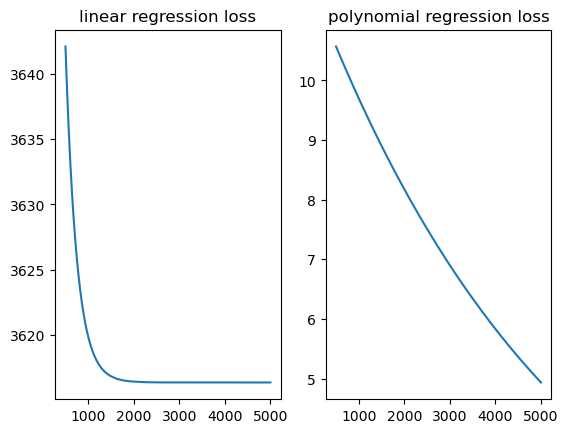

In [6]:
# making data
np.random.seed(1)
X = np.random.uniform(-5, 5, 100)
epsilon = np.random.normal(0, 0.5, 100)
y = 3 * X**3 - 2 * X**2 + 5 + epsilon

X = torch.from_numpy(X).float().unsqueeze(1) # shape (100, 1)
y = torch.from_numpy(y).float().unsqueeze(1) # shape (100, 1)

X_pr = torch.cat([X ** i for i in range(1, 4)], dim=1) # shape (100, 3)


# implement polynoimal regression of degree 3 
LEARNING_RATE = 0.0001
NUM_ITERATIONS = 5000

class polynomialRegression(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = torch.nn.Linear(in_features=3, out_features=1)
    
    def forward(self, x):
        return self.linear(x)

model = polynomialRegression()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)

# training loop
loss_list_pr = []
for epoch in range(NUM_ITERATIONS):
    optimizer.zero_grad()
    
    out = model(X_pr)              # make prediction
    loss = criterion(out, y)    # calculate loss
    loss.backward()             # backpropagation
    optimizer.step()            # update parameters
    loss_list_pr.append([epoch, loss.item()])    

# implement linear regresion model 
LEARNING_RATE = 0.001
NUM_ITERATIONS = 5000

class linearRegression(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = torch.nn.Linear(in_features=1, out_features=1)

    def forward(self, x):
        return self.linear(x)

model = linearRegression()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)

# training loop
loss_list_lr = []
for epoch in range(NUM_ITERATIONS):
    optimizer.zero_grad()
    
    out = model(X)              # make prediction
    loss = criterion(out, y)    # calculate loss
    loss.backward()             # backpropagation
    optimizer.step()            # update parameters
    loss_list_lr.append([epoch, loss.item()])    

# compare results 
loss_list_lr = np.array(loss_list_lr)
loss_list_pr = np.array(loss_list_pr)
fig, axes = plt.subplots(1, 2)

axes[0].plot(loss_list_lr[500:, 0], loss_list_lr[500:, 1], label='linear regression loss')
axes[0].set_title('linear regression loss')
axes[1].plot(loss_list_pr[500:, 0], loss_list_pr[500:, 1], label='polynomial regression loss')
axes[1].set_title('polynomial regression loss')
plt.show()


**Task**: Implement polynomial regression of degree 3 using PyTorch. Train the model and compare the training loss to that of a simple linear regression model.


## 5. Overfitting and Regularization


**Dataset**: Use the following code to generate a dataset with 150 samples:


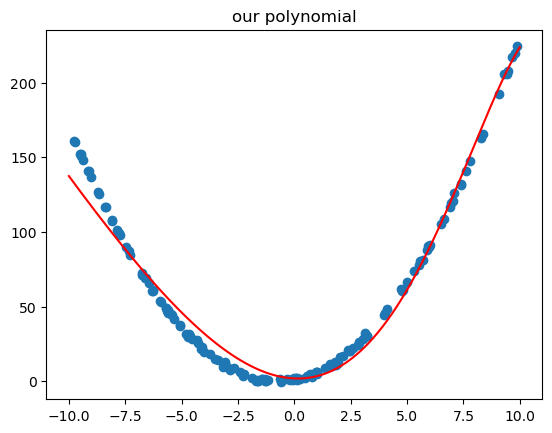

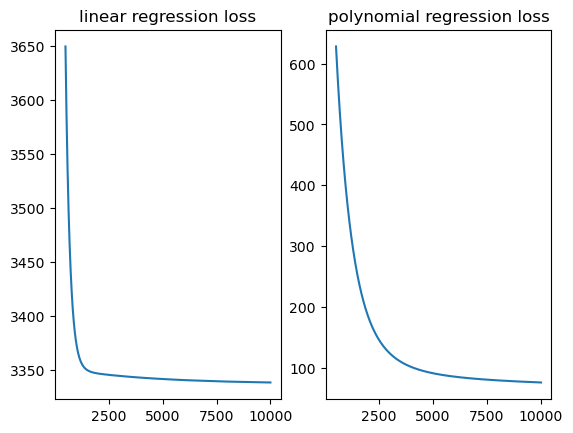

In [145]:
# make data
np.random.seed(2)
X = np.random.uniform(-10, 10, 150)
epsilon = np.random.normal(0, 1, 150)
y = 2 * X**2 + 3 * X + 1 + epsilon

X = torch.from_numpy(X).float().unsqueeze(1) # shape (150, 1)
y = torch.from_numpy(y).float().unsqueeze(1) # shape (150, 1)

X_min, X_max = X.min(), X.max()
X_scaled = (X - X_min) / (X_max - X_min) # scaling data, without this out model doesn't work 
X_pr = torch.cat([X_scaled ** i for i in range(1, 11)], dim=1) # shape (150, 10)

# implement polynoimal regression of degree 3 
LEARNING_RATE = 0.1
L2_LAMBDA = 0.001
NUM_ITERATIONS = 10000

class polynomialRegression(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = torch.nn.Linear(in_features=10, out_features=1)
    
    def forward(self, x):
        return self.linear(x)

model = polynomialRegression()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE, weight_decay=L2_LAMBDA)

# training loop
loss_list_pr = []
for epoch in range(NUM_ITERATIONS):
    optimizer.zero_grad()
    
    out = model(X_pr)           # make prediction
    loss = criterion(out, y)    # calculate loss
    loss.backward()             # backpropagation
    optimizer.step()            # update parameters
    loss_list_pr.append([epoch, loss.item()])

# prepare data for visualize our polynomial
X_plot = np.linspace(-10., 10., 500)
X_plot_tensor = torch.from_numpy(X_plot).float().unsqueeze(1)
X_plot_tensor_scaled = (X_plot_tensor - X_min) / (X_max - X_min)
X_plot_pr = torch.cat([X_plot_tensor_scaled ** i for i in range(1, 11)], dim=1)

# ploting our polynomial
model.eval()
with torch.no_grad():
    out = model(X_plot_pr)
out = np.array(out)
plt.plot(X_plot, out, color='red')
plt.scatter(X.numpy(), y.numpy())
plt.title('our polynomial')
plt.show()


# implement linear regresion model 
LEARNING_RATE = 0.001
NUM_ITERATIONS = 10000

class linearRegression(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = torch.nn.Linear(in_features=1, out_features=1)

    def forward(self, x):
        return self.linear(x)

model = linearRegression()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)

# training loop
loss_list_lr = []
for epoch in range(NUM_ITERATIONS):
    optimizer.zero_grad()
    
    out = model(X_scaled)              # make prediction
    loss = criterion(out, y)    # calculate loss
    loss.backward()             # backpropagation
    optimizer.step()            # update parameters
    loss_list_lr.append([epoch, loss.item()])    

# compare results 
loss_list_lr = np.array(loss_list_lr)
loss_list_pr = np.array(loss_list_pr)
fig, axes = plt.subplots(1, 2)

axes[0].plot(loss_list_lr[500:, 0], loss_list_lr[500:, 1], label='linear regression loss')
axes[0].set_title('linear regression loss')
axes[1].plot(loss_list_pr[500:, 0], loss_list_pr[500:, 1], label='polynomial regression loss')
axes[1].set_title('polynomial regression loss')
plt.show()


**Task**: Fit two models: (i) a linear regression model, and (ii) a polynomial regression model of degree 10. Compare the training and validation performance of both models. Apply L2 regularization to the polynomial model and observe the effect on overfitting.


## 6. Custom Gradient Descent in PyTorch

a = 2.9587643414035214, b = 1.571145185897157


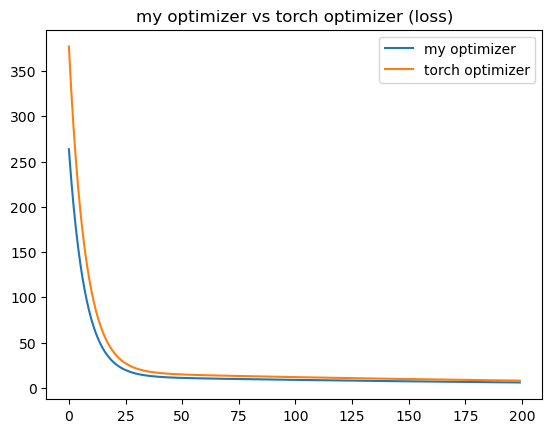

In [150]:
# making data 
np.random.seed(0)
X = np.random.uniform(-10, 10, 100)
epsilon = np.random.normal(0, 0.1, 100) # normal (gaussian) distribution 
y = 3 * X + 4 + epsilon

X_my = X[:, np.newaxis]
y_my = y[:, np.newaxis]
    
LEARNING_RATE = 0.001
NUM_ITERATIONS = 200
loss_list = [[], []]

# SGD from scratch
# Target: Implement linear regression with SGD and MSE  

class my_model:
    def __init__(self, lr):
        # y = ax + b
        self.a = np.random.rand()
        self.b = np.random.rand()
        self.gradient_a = 0 # here I store  dloss/da
        self.gradient_b = 0 # here I store  dloss/db
        self.lr = lr
    
    # update value of a and b 
    def step(self):
        self.a = self.a - self.lr * self.gradient_a
        self.b = self.b - self.lr * self.gradient_b
    
    # clear gradient 
    def zero_grad(self):
        self.gradient_a = 0
        self.gradient_b = 0

    # make predictions 
    def predict(self, x):
        return self.a * x + self.b
    
    # compute derivative of loss ( dloss/da and dloss / db)
    def backward(self, y_pred, y_true, x): 
        self.gradient_a = 2 * np.mean((y_pred - y_true) * x)
        self.gradient_b = 2 * np.mean(y_pred - y_true)
        
    def calculate_loss(self, y_pred, y_true):
        return np.mean((y_pred - y_true) ** 2)
        
model = my_model(LEARNING_RATE)
# training loop
for epoch in range(NUM_ITERATIONS):
    model.zero_grad() 
    
    out = model.predict(X_my)
    loss = model.calculate_loss(out, y_my)
    model.backward(out, y_my, X_my)
    
    model.step()
    loss_list[0].append([epoch, loss])
print(f'a = {model.a}, b = {model.b}')

# with torch.optim 
X = torch.from_numpy(X).float().unsqueeze(1) # shape (100, 1) 
y = torch.from_numpy(y).float().unsqueeze(1) # shape (100, 1)

class linearRegression(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = torch.nn.Linear(in_features=1, out_features=1)

    def forward(self, x):
        return self.linear(x)

model = linearRegression()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)

# training loop
for epoch in range(NUM_ITERATIONS):
    optimizer.zero_grad()
    
    out = model(X)
    loss = criterion(out, y)
    loss.backward() 
    optimizer.step()
    loss_list[1].append([epoch, loss.item()])
    
# making plot 
loss_list = np.array(loss_list)
plt.plot(loss_list[0, : , 0], loss_list[0, :, 1], label='my optimizer')
plt.plot(loss_list[1, : , 0], loss_list[1, :, 1], label='torch optimizer')
plt.legend()
plt.title('my optimizer vs torch optimizer (loss)')
plt.show()


**Dataset**: Use the same dataset from Problem 2.

**Task**: Implement a custom gradient descent algorithm without using an optimizer from `torch.optim`. Train a linear regression model using this custom implementation and compare the training results with those obtained using PyTorch's `SGD` optimizer.


## 7. Dataset Size and Convergence


**Dataset**: Use the following code to create three datasets of sizes 50, 100, and 500 samples:


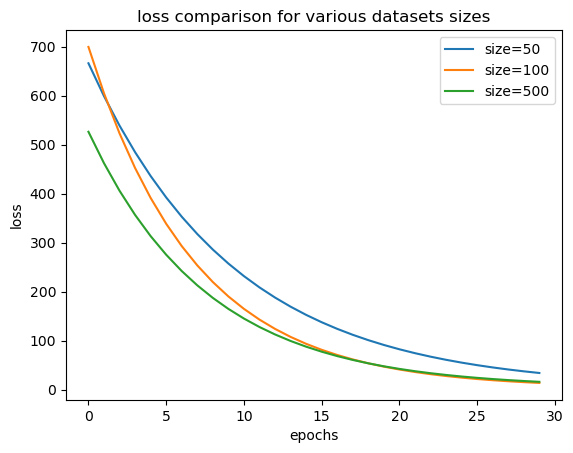

In [ ]:
# make datasets
from dataclasses import dataclass
from typing import List

np.random.seed(3)
torch.manual_seed(3)
sizes = [50, 100, 500]

@dataclass
class Data: # more convenient than list, we could also use namedtuple from collections
    X: List[int]
    y: List[int]
    size: int 
    loss_list: List[List[int]] # list of two elements lists with epoch and loss -> [[epoch_0, loss_0], [epoch_1, loss_1], ...]
    
datasets = [Data([], [], sizes[i], []) for i in range(3)]
for i in range(3):
    X = np.random.uniform(-10, 10, sizes[i])
    epsilon = np.random.normal(0, 0.2, sizes[i])
    y = 4 * X - 3 + epsilon
    
    datasets[i].X = torch.from_numpy(X).float().unsqueeze(1)
    datasets[i].y = torch.from_numpy(y).float().unsqueeze(1)
    
# create linear regression model
LEARNING_RATE = 0.001
NUM_ITERATIONS = 30

class linearRegression(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = torch.nn.Linear(in_features=1, out_features=1)
    
    def forward(self, x):
        return self.linear(x)

for dataset in datasets:    
    model = linearRegression()
    criterion = torch.nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)
    
    # training loop
    for epoch in range(NUM_ITERATIONS):
        optimizer.zero_grad()
        
        out = model(dataset.X)
        loss = criterion(out, dataset.y)
        loss.backward()
        optimizer.step()
        
        dataset.loss_list.append([epoch, loss.item()])

# plot results
plt.plot(np.array(datasets[0].loss_list)[:, 0], np.array(datasets[0].loss_list)[:, 1], label=f'size={datasets[0].size}')
plt.plot(np.array(datasets[1].loss_list)[:, 0], np.array(datasets[1].loss_list)[:, 1], label=f'size={datasets[1].size}')
plt.plot(np.array(datasets[2].loss_list)[:, 0], np.array(datasets[2].loss_list)[:, 1], label=f'size={datasets[2].size}')
plt.title('loss comparison for various datasets sizes')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


**Task**: Train linear regression models on each dataset using PyTorch. Compare the convergence rates of gradient descent for each dataset size by plotting the training loss over epochs.


## 8. Effect of Model Complexity on Overfitting


**Dataset**: Use the following code to generate a dataset of 200 samples:


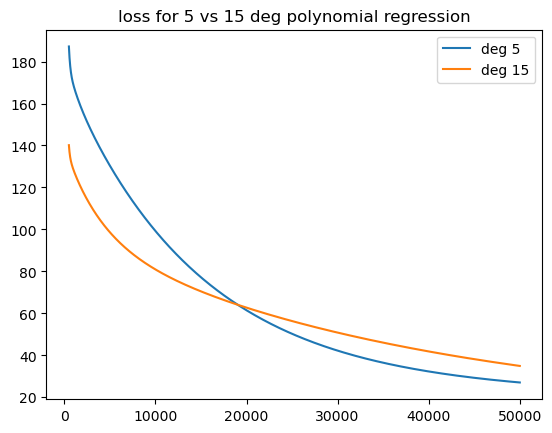

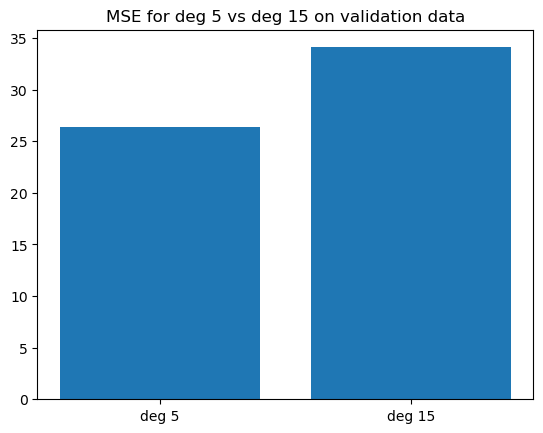

In [165]:
# make dataset 
np.random.seed(4)
X = np.random.uniform(-5, 5, 200)
X_test = np.random.uniform(-5, 5, 200)

epsilon = np.random.normal(0, 0.5, 200)
y = 2 * X**2 + X + epsilon

epsilon = np.random.normal(0, 0.5, 200)
y_test = 2 * X_test**2 + X_test + epsilon

X = torch.from_numpy(X).float().unsqueeze(1)
y = torch.from_numpy(y).float().unsqueeze(1)
X_test = torch.from_numpy(X_test).float().unsqueeze(1)
y_test = torch.from_numpy(y_test).float().unsqueeze(1)

X_min, X_max = X.min(), X.max()
X_scaled = (X - X_min) / (X_max - X_min)
X_5 = torch.cat([X_scaled ** i for i in range(1, 6)], dim=1)
X_15 = torch.cat([X_scaled ** i for i in range(1, 16)], dim=1)

X_test_scaled = (X_test - X_min) / (X_max - X_min)
X_5_test = torch.cat([X_test_scaled ** i for i in range(1, 6)], dim=1)
X_15_test = torch.cat([X_test_scaled ** i for i in range(1, 16)], dim=1)

# implement polynomial regression
LEARNING_RATE = 0.001
NUM_ITERATIONS = 50000

class polynomialRegression(torch.nn.Module):
    def __init__(self, in_features):
        super().__init__()
        self.linear = torch.nn.Linear(in_features=in_features, out_features=1)
        
    def forward(self, x):
        return self.linear(x)

loss_5, loss_15 = [], []

# pylynomial regression 5
model = polynomialRegression(5)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)

for epoch in range(NUM_ITERATIONS):
    optimizer.zero_grad()
    
    out = model(X_5)
    loss = criterion(out, y)
    loss.backward()
    optimizer.step()
    
    loss_5.append([epoch, loss.item()])
    
model.eval()
with torch.no_grad():
    out = model(X_5_test)
    loss_5_test = criterion(out, y_test)

# pylynomial regression 15
model = polynomialRegression(15)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)

for epoch in range(NUM_ITERATIONS):
    optimizer.zero_grad()
    
    out = model(X_15)
    loss = criterion(out, y)
    loss.backward()
    optimizer.step()
    
    loss_15.append([epoch, loss.item()])
    
model.eval()
with torch.no_grad():
    out = model(X_15_test)
    loss_15_test = criterion(out, y_test)

# plot loss
loss_5 = np.array(loss_5)
loss_15 = np.array(loss_15)

plt.plot(loss_5[500:, 0], loss_5[500:, 1], label='deg 5')
plt.plot(loss_15[500:, 0], loss_15[500:, 1], label='deg 15')
plt.legend()
plt.title('loss for 5 vs 15 deg polynomial regression')
plt.show()

# plot loss on test X
plt.bar(["deg 5", "deg 15"], [loss_5_test, loss_15_test])
plt.title('MSE for deg 5 vs deg 15 on validation data')
plt.show()


**Task**: Fit polynomial regression models of degrees 5 and 15 to the dataset. Plot the training and validation errors for both models.


## 9. Gradient Descent for Non-linear Data


**Dataset**: Use the following code to generate a dataset of 100 samples:


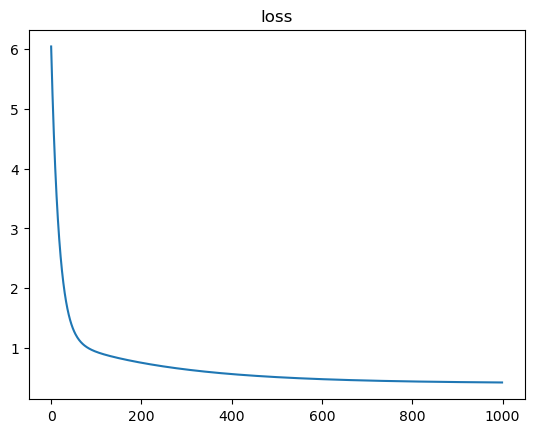

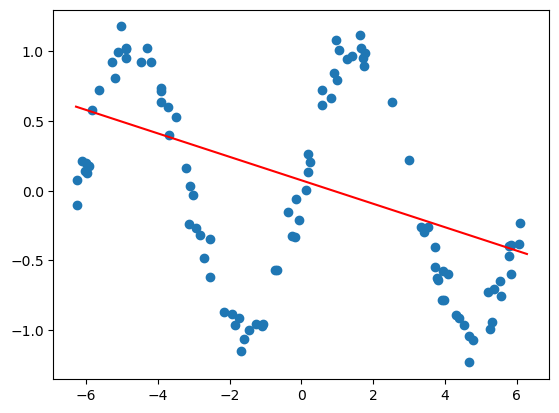

In [ ]:
# creat data
np.random.seed(5)
X = np.random.uniform(-2 * np.pi, 2 * np.pi, 100)
epsilon = np.random.normal(0, 0.1, 100)
y = np.sin(X) + epsilon

X = torch.from_numpy(X).float().unsqueeze(1)
y = torch.from_numpy(y).float().unsqueeze(1)

# create model
LEARNING_RATE = 0.001
NUM_ITERATIONS = 1000

class linearRegression(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = torch.nn.Linear(in_features=1, out_features=1)
    def forward(self, x):
        return self.linear(x)
    
model = linearRegression()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)

loss_list = []
for epoch in range(NUM_ITERATIONS):
    optimizer.zero_grad()
    
    out = model(X)
    loss = criterion(out, y)
    loss.backward()
    optimizer.step()
    
    loss_list.append([epoch, loss.item()])

# plot loss
loss_list = np.array(loss_list)
plt.plot(loss_list[:, 0], loss_list[:, 1])
plt.title('loss')
plt.show()


# plot our model
X_plot = np.linspace(-2 * np.pi, 2 * np.pi, 500)
X_plot = torch.from_numpy(X_plot).float().unsqueeze(1)
model.eval()
with torch.no_grad():
    out = model(X_plot)
out = np.array(out)

plt.plot(X_plot, out, color='red')
plt.scatter(X.numpy(), y.numpy())
plt.show()

# conclustion: you cant predict nonlinear data with linear model


**Task**: Implement gradient descent to fit a linear model to this dataset. Discuss the challenges and limitations of fitting a linear model to non-linear data.
